This practical work, on motion estimation, has 3 different parts, corresponding to three families of algorithms that we have seen in class:
- Block matching algorithms
- Optic flow
- Parametric motion estimation.

You are asked to complete the different algorithms and to try it. Also, please answer to the theoretical questions, in the notebook.

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from me_ssd import me_ssd
from displayMVF import displayMVF
from fracMc import fracMc
from PSNR import PSNR
from me_sad import me_sad
from HornSchunck import HS
from applyAffineMotion import applyAffineMotion
from angle2D import angle2D
from gradient import gradient
from medianFilter import medianFilter

# I - Block matching algorithms
## I-1 - Unregularized algorithms
### I-1-a - Unregularized SSD-based algorithm

First, read the two images 'flower_cif_1.mat' and 'flower_cif_1.mat', which are two consecutive frames of a video sequence. You will have to estimate the motion between these frame, using block matching algorithms.

In [2]:
im1 = loadmat('flower_cif_1.mat')['im1']
im1 = im1.astype('float')
im2 = loadmat('flower_cif_2.mat')['im2']
im2 = im2.astype('float')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x152e3093670>)

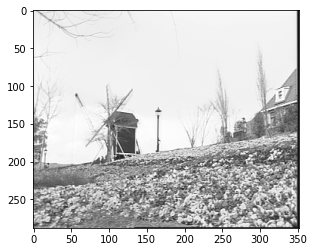

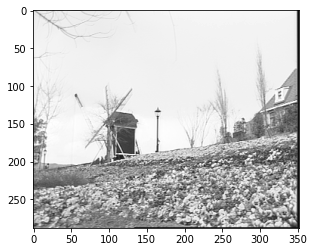

In [3]:
plt.figure(),plt.imshow(im1,cmap='gray')
plt.figure(),plt.imshow(im2,cmap='gray')

First, you will have to encode a block matching using the SSD criterion. Some default values of the algorithm are given below: the number of column and rows in each block, and the search radius.

In [4]:
brow = 8 # Number of rows per block
bcol = 8 # Number of columns per block
search_radius = 8 # Search radius

Code the me_ssd function in the me_ssd file. First, implement the unregularized function.

In [5]:
mvf_ssd,prediction =  me_ssd(im2, im1, brow, bcol, search_radius)

Show the motion vector field using the displayMVF function. Write your remarks. Are there errors? If yes, where and why?

Change the block size and the search area radius. How does it impact your results?

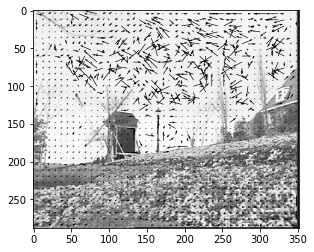

In [6]:
displayMVF(im1,mvf_ssd,brow)

Motion compensation: now that we have computed the movement vector field, we can compute the motion compensated image. Display the motion compensated image. What can you observe ?

TO DO : code the motion compensation function

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x152e627ae60>)

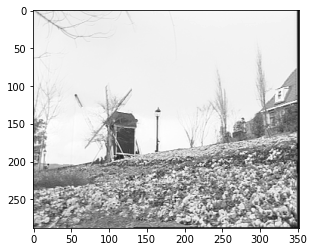

In [7]:
mc_ssd = fracMc(im1,mvf_ssd)
plt.figure(),plt.imshow(mc_ssd,cmap='gray')

Compute the PSNR between the motion compensated and the current images.

What is the definition of PSNR ? Is the PSNR between the motion-compensated image and im2 better than between im1 and im2 ? Explain why.

**Answer** : By definition : $PSNR = 20log_{10}\left(\frac{MAX_I}{\sqrt{MSE}}\right)$ where $MAX_I$ is the maximum pixel value (255) and $MSE$ is the mean square error between both images.<br>
The PSNR is slightly better with the motion-compensated image than the previous image (22 vs. 18). But this gap is irrelevant. Moreover, when we visually compare im2 and mc_ssd we notice that they are almost identical. The motion hasn't been compensated.

## WHY ??



Code the PSNR function. Compute it using the BM algorithm results, with different parameter values. Explain what you observe.

**Answer** : When we decrease the number of rows and columns per blocks, the PSNR is increasing. Same if we increase the search radius. However, the PSNR doesn't increases over 24.

In [8]:
psnr_ssd = PSNR(im2,mc_ssd)
print(psnr_ssd)

23.226778206199043


### I-1-b Unregularized SAD-based algorithm
Now, we will use the SAD as a metric for the block matching algorithm. To do that, implement the me_sad algorithm. Please note that you function should be very similar to me_ssd, except for the metric (as such, as a starting point, you can copy paste what you have proposed for me_ssd).

In [9]:
mvf_sad,prediction =  me_sad(im2, im1, brow, bcol, search_radius)

Show the motion vector field using the displayMVF function. Do you see any difference with the SSD ? Explain.

**Answer** : The difference between the two metrics is very light. There seem to be a bit less outliers with the SAD, especially when we increase the research radius. However, the PSNR values are very similar. So we can't say that one metric is highly better than another between SAD and SSD.<br>
This might be due to the absence of the regularization term. 

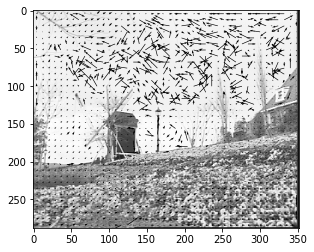

In [10]:
displayMVF(im1,mvf_sad,brow)

Motion compensation: compute the motion compensated image and display it. In addition, compute the PSNR.

Comment the difference observed between SSD and SAD in terms of regularity of the motion vector field, PSNR of the prediction and impact of the block size.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x152e678be50>)

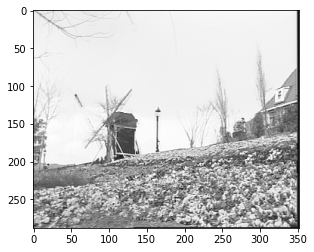

In [11]:
mc_sad = fracMc(im1,mvf_sad)
plt.figure(),plt.imshow(mc_sad,cmap='gray')

In [12]:
psnr_sad = PSNR(im2,mc_sad)
print(psnr_sad)

23.168301620378593


## I-2- Regularized algorithms
Now, we will add a regularization term to the metrics (SSD and then SAD) we previously used.
### I-2-1- Regularized SSD-based algorithm

In [13]:
brow = 8 # Number of rows per block
bcol = 8 # Number of columns per block
search_radius = 8 # Search radius

TO DO : code the regularized SSD-based algorithm.
For the sake of simplicity, the regularizing function is already given. How does it work and what does it compute?

Try several parameter values, and compare your results with the unregularized algorithms. What can you observe?

Regularization


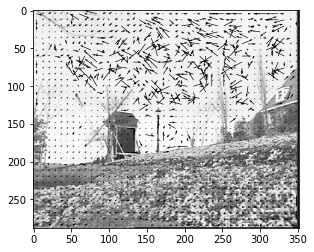

In [14]:
mvf_ssd_reg,prediction_reg =  me_ssd(im2, im1, brow, bcol, search_radius, lamb=50)
# mvf_ssd_reg1,prediction_reg1 =  me_ssd(im2, im1, brow, bcol, search_radius, lamb=1)
# mvf_ssd_reg2,prediction_reg2 =  me_ssd(im2, im1, brow, bcol, search_radius, lamb=5)
displayMVF(im1,mvf_ssd_reg,brow)
# displayMVF(im1,mvf_ssd_reg1,brow)
# displayMVF(im1,mvf_ssd_reg2,brow)

### I-2-2- Regularized SAD-based algorithm

TO DO : code the regularized SAD-based algorithm.

Try several parameter values, and compare your results with the unregularized algorithms and the regularized SSD-based algorithm.

# Optical flow

You will now implement the Horn and Schunck algorithm to estimate the optic flow. The two images we will consider here have a more local movement vector field, since we are considering small movements in a face.

In [15]:
im1 = loadmat('akiyo_cif1.mat')['im1']
im1 = im1.astype('float')
im2 = loadmat('akiyo_cif2.mat')['im2']
im2 = im2.astype('float')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x152e65d4d00>)

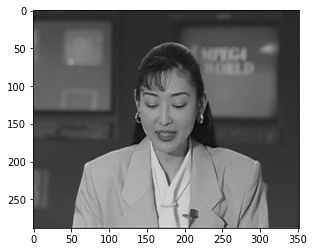

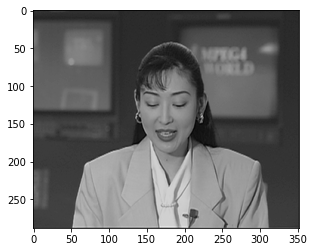

In [16]:
plt.figure(),plt.imshow(im1,cmap='gray')
plt.figure(),plt.imshow(im2,cmap='gray')

Compute the optical flow by filling the gaps in the Horn and Schunck function. You can use the motion field that you estimated before with the block matching algorithms to initialize you algorithm.

As a reminder, the optical flow is implemented by the iterative Horn and Schunck's algorithm:
$$
u^{n+1} = \bar{u}^n - f_x \frac{\bar{u}^n f_x + \bar{v}^n f_y + f_t}{\alpha^2 + \|\nabla f\|^2}
$$
$$
v^{n+1} = \bar{v}^n - f_y \frac{\bar{u}^n f_x + \bar{v}^n f_y + f_t}{\alpha^2 + \|\nabla f\|^2}
$$
where $u^n$ is the value of the $u$ component at the $n$-th iteration, and $\bar{u}$ is the local average of $u$.

In [17]:
brow = 16; bcol=16; search_radius =13;

mvf_ssd,prediction =  me_ssd(im2, im1, brow, bcol, search_radius, lamb=5)

alpha = 100
ite = 100

# utemp=np.zeros(mvf_ssd[:,:,0].shape + 1)
# utemp[1:-1,1:-1] = mvf_ssd[:,:,0]

# vtemp=np.zeros(mvf_ssd[:,:,0].shape + 1)
# vtemp[1:-1,1:-1] = mvf_ssd[:,:,1]

uInitial = mvf_ssd[:,:,0] # Rem: pay attention to the inversion of the order compare to me_ssd.
vInitial = mvf_ssd[:,:,1]
[u, v] = HS(im2, im1, uInitial, vInitial, alpha, ite,blur=1.)

Regularization


Display the motion field and compute the PSNR. Do you observe any improvement compare to block-matching algorithms? Explain. You can test on both the Akiyo and Flowers images.

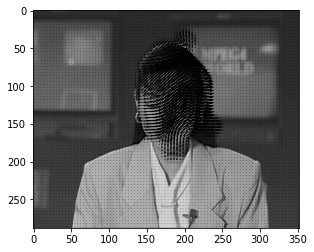

In [18]:
mvf_hs = np.zeros((np.shape(v)[0],np.shape(v)[1],2))
mvf_hs[:,:,0] = v
mvf_hs[:,:,1] = u
displayMVF(im1,mvf_hs,4)

mc_hs = fracMc(im1,mvf_hs)
psnr_hs = PSNR(im2,mc_hs)

In [19]:
psnr_hs

32.582984059764286

## End of TP 1

# III - Parametric estimation
In this last part, we will work on parametric estimation, both using direct and indirect methods.
## III-1- Direct parametric estimation
### III-1-1 Theoretical questions

**Infinite signal**

Let $a: (n,m)\in \mathbb{Z}^2 \rightarrow \mathbb{R}$ be a bi-dimensional signal and $b(n,m)$ a signal of the same type.

Recall the expression of the 2D discrete time Fourier transform (DTFT).

**Answer** :
$$\forall \nu \in \left]-\frac{1}{2} ; \frac{1}{2}\right[, \,\, \hat{u}(\nu_x, \nu_y)=\sum_{n=-\infty}^{+\infty} \sum_{m=-\infty}^{+\infty} u(n,m) e^{-2i\pi(\nu_x n + \nu_y m)}$$

Let us suppose that
$\exists c,d \in \mathbb{Z}^2: \forall n,m \in \mathbb{Z}^2,b(n,m) = a(n+c,m+d)$ (that is, $b$ is a translation of $a$). Compute the DTFT of $b$ as a function of the one of $a$ and of the displacement $(c,d)$.

Show that the ratio between the DTFTs is:
$$
\frac{\hat{b}(\nu_x,\nu_y)}{\hat{a}(\nu_x,\nu_y)} = \exp(i2\pi (c\nu_x + d \nu_y))
$$

By defining $b$ in that way, $\hat{b}$ is just a shift of $\hat{a}$. Hence we have :
$$\mathcal{F}(b(n,m))(\nu_x, \nu_y) = \mathcal{F}(a(n+c,m+d))(\nu_x, \nu_y) = e^{-2i\pi(-\nu_x c -\nu_x d)}\mathcal{F}(a(n,m))(\nu_x, \nu_y)=e^{+2i\pi(\nu_x c +\nu_x d)}\mathcal{F}(a(n,m))(\nu_x, \nu_y)$$

So : 
$$\frac{\mathcal{F}(b(n,m))(\nu_x, \nu_y)}{\mathcal{F}(a(n,m))(\nu_x, \nu_y)}=e^{-2i\pi(-\nu_x c -\nu_x d)}$$

**Finite signal**

Now, $a: (n,m) \in \{0,1,...,N-1\}^2 \rightarrow \mathbb{R}$ and $b(n,m)$ are both finite signals. In that case, we use the Discrete Fourier Transform (DFT) rather than the DTFT.

Recall the expression of the 2D DFT.

**Answer** :

$$\forall (k,l) \in \{0, ..., N-1\}, \,\, \hat{u}(k,l)=\frac{1}{N^2}\sum_{n=0}^{N-1} \sum_{m=0}^{N-1} u(n,m) e^{-2i\pi(\frac{k}{N}n + \frac{l}{N}m)}$$

Under which hypotheses is the ratio between $a$'s and $b$'s DFT a linear phase signal:
$$
\frac{\hat{A}(k_x,k_y)}{\hat{B}(k_x,k_y)} = \exp\left(\frac{2i\pi(ck_x + dk_y)}{N^2}\right)
$$

By reasoning in the same way than the previous question, we need to have $b(n,m) = a(n+c,m+d)$

### III-1-2 Practical part
First, start to work on the 'ball.mat' image. We will apply a translation to this image and try to estimate the parameter of the translation.

Try by either adding of not some noise into the image.

In [20]:
im1 = loadmat('ball.mat')['im1']
im1 = im1.astype('float')

# im1 = loadmat('lena.mat')['im1']
# im1 = im1.astype('float')

N, M = np.shape(im1)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x152f4bf1270>)

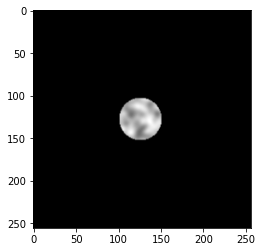

In [21]:
# Potentially add noise to the image
sigma = 0
# im1 = im1 + sigma*np.random.randn(np.shape(im1)[0],np.shape(im1)[1])
plt.figure(),plt.imshow(im1,cmap='gray')

In the following, we apply a translation to the image.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x152e6a3a440>)

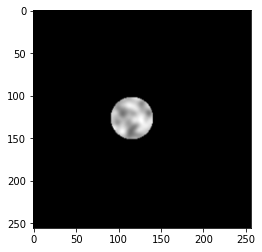

In [22]:
horiz_displacement = 10.
vert_displacement  = 1.
b = np.array([ horiz_displacement, vert_displacement])

# We could also use an affine motion matrix
#B = np.zeros((2,2))

im2 = applyAffineMotion(im1,b)
plt.figure(),plt.imshow(im2,cmap='gray')

Compute the FFT of the two images. Using the indications given in the theroretical part, describe a method with which you can find the parameters of the translation from the two FFTs. 

**Answer** : We plot the phase of the ratio of the two FFT. If it is a translation, we should get a linear relation. So we just need to get the slope in each direction and multiply is by $\frac{N^2}{2i\pi}$

In [23]:
IM1 = np.fft.fft2(im1)
IM2 = np.fft.fft2(im2)

In [24]:
phi = angle2D(IM1/IM2)

Display phi. Is it a linear plane and why?

**Answer** : It is indeed a linear plane. It is normal because phi is a linear cobination of n and m, according to the theorical part. 

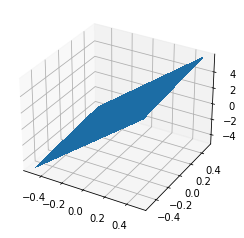

In [25]:
fx, fy = np.meshgrid(np.arange(-(M-1)/2,(M-1)/2+1)/M, np.arange(-(N-1)/2,(N-1)/2+1)/N)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(fx, fy, phi, linewidth=0, antialiased=False)

Translation estimation: to estimate the parameters of the translation, we are now looking for the slope of the plane.

Method 1: estimate it using the median of the gradient. To do that, complete the gradient function.

In [26]:
gx, gy = gradient(phi,1/M,1/N)
GX = np.median(gx)
GY = np.median(gy)

In [27]:
print(GX)
print(GY)

10.0
1.0


Method 2: the code below computes the least Square planar approximation of phi, enabling you how to estimate the parameters of the translation. Explain how it works.

In [28]:
phi = phi-phi[int(N/2+2), int(M/2+2)]
t = medianFilter(phi,1)

In [29]:
A = np.zeros((np.shape(fx)[0]*np.shape(fx)[1],2))
A[:,0] = fx.reshape(np.shape(fx)[0]*np.shape(fx)[1])
A[:,1] = fy.reshape(np.shape(fy)[0]*np.shape(fy)[1])
b = t.reshape(np.shape(t)[0]*np.shape(t)[1])
bEst = np.dot(np.linalg.pinv(A),b)

In [30]:
print(bEst)

[10.  1.]


Relaunch the above code:
- with and without noise

**Answer** : The noise doesn't change anything to the estimation for the ball image.

- with the lena image, instead of the ball image.


**Answer** :  The obtained plan is not affine with the image of lena. This is probably due to the complexity of the phase of the image. Some parts of the translated image could match with other translation parameters.

Each time, are you able to correctly estimate the translation? Why? Comment your results.

# III-2-Indirect parametric estimation
In this last part, we will perform indirect parametric estimation. The movement vector field will be estimated by 1) block matching; 2) optic flow. Each time, you will then estimate the translation by taking the median of the estimated vector field.

Perform the experiment without and with noise (you can then take sigma = 2).

Finally, compare all the parametric estimation methods when the translation values are not integer.

**Answer** : The functions i implemented seem not working well in this case.

-10.0
-10.0


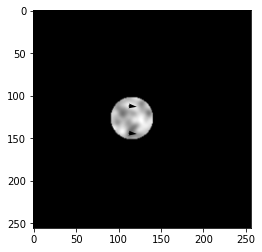

In [31]:
lamb = 0
mvf,prediction = me_ssd(im2,im1,32,32,10,lamb)
displayMVF(im2,mvf,32)
mvf_x = mvf[:,:,1]
mvf_y = mvf[:,:,0]
bx = np.median(mvf_x)
by = np.median(mvf_y)
print(bx)
print(by)

Estimation with optic flow

-9.899634763757131
-9.725003569069122


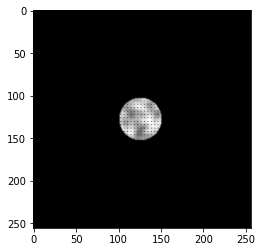

In [32]:
alpha = 100
ite = 100
uInitial = mvf[:,:,1]
vInitial = mvf[:,:,0]
u, v = HS(im2, im1, uInitial, vInitial, alpha, ite)
mvf_hs = np.zeros((np.shape(v)[0],np.shape(v)[1],2))
mvf_hs[:,:,0] = v
mvf_hs[:,:,1] = u
displayMVF(im1,mvf_hs,4)
bx = np.median(u)
by = np.median(v)
print(bx)
print(by)